<a href="https://colab.research.google.com/github/RaihanFazzaufaR/22_RaihanFazzaufaRasendriya/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.

In [16]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [17]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

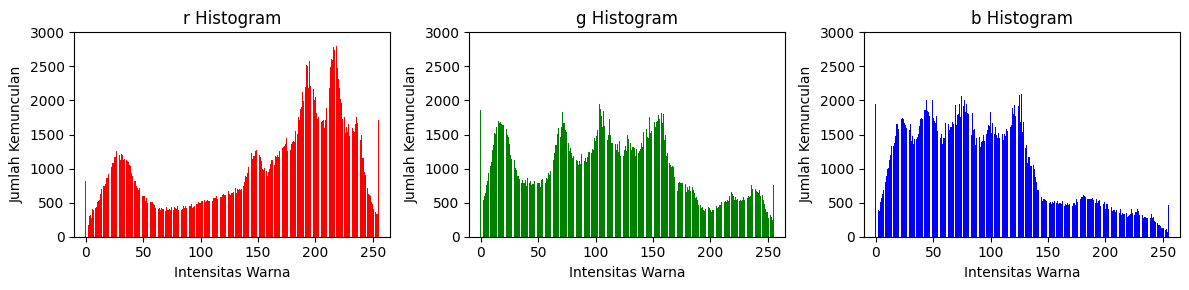

In [18]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

channels = cv.split(image)

color = ('r', 'g', 'b')

plt.figure(figsize=(12, 3))

for i, channel in enumerate(channels):
    plt.subplot(1, 3, i+1)
    hist = cv.calcHist([channel], [0], None, [256], [0, 256]) # calcHist memberikan hasil array 2D sehingga perlu diubah menjadi 1D
    plt.bar(np.arange(256), hist[:, 0], color=color[i].lower())
    plt.title(f'{color[i]} Histogram')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([-10, 265])
    plt.ylim([0,3000])

plt.tight_layout()
plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?


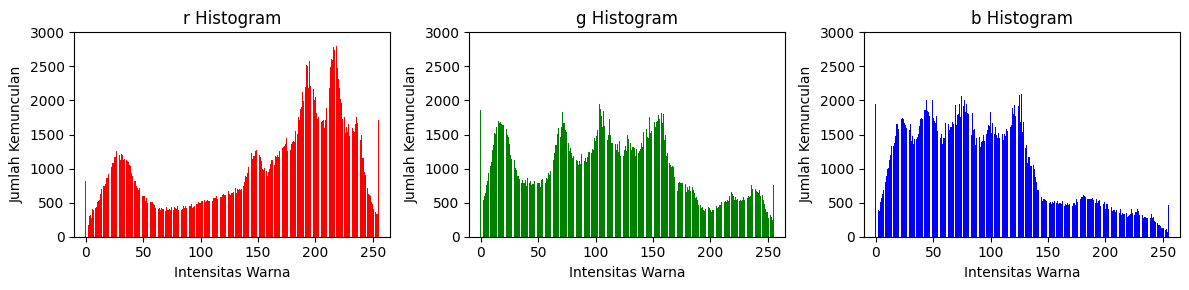

In [19]:
image1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)

channels = cv.split(image1)

color = ['r', 'g', 'b']
plt.figure(figsize=(12, 3))

for i, channel in enumerate(channels):
    plt.subplot(1, 3, i+1)
    hist, bins = np.histogram(channel.flatten(), bins=256, range=[0, 256])  #np.histogram memberikan bentuk array 1D untuk jumlah kemunculan pixel
    plt.bar(bins[:-1], hist, color=color[i].lower())
    plt.title(f'{color[i]} Histogram')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([-10, 265])
    plt.ylim([0,3000])

plt.tight_layout()
plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

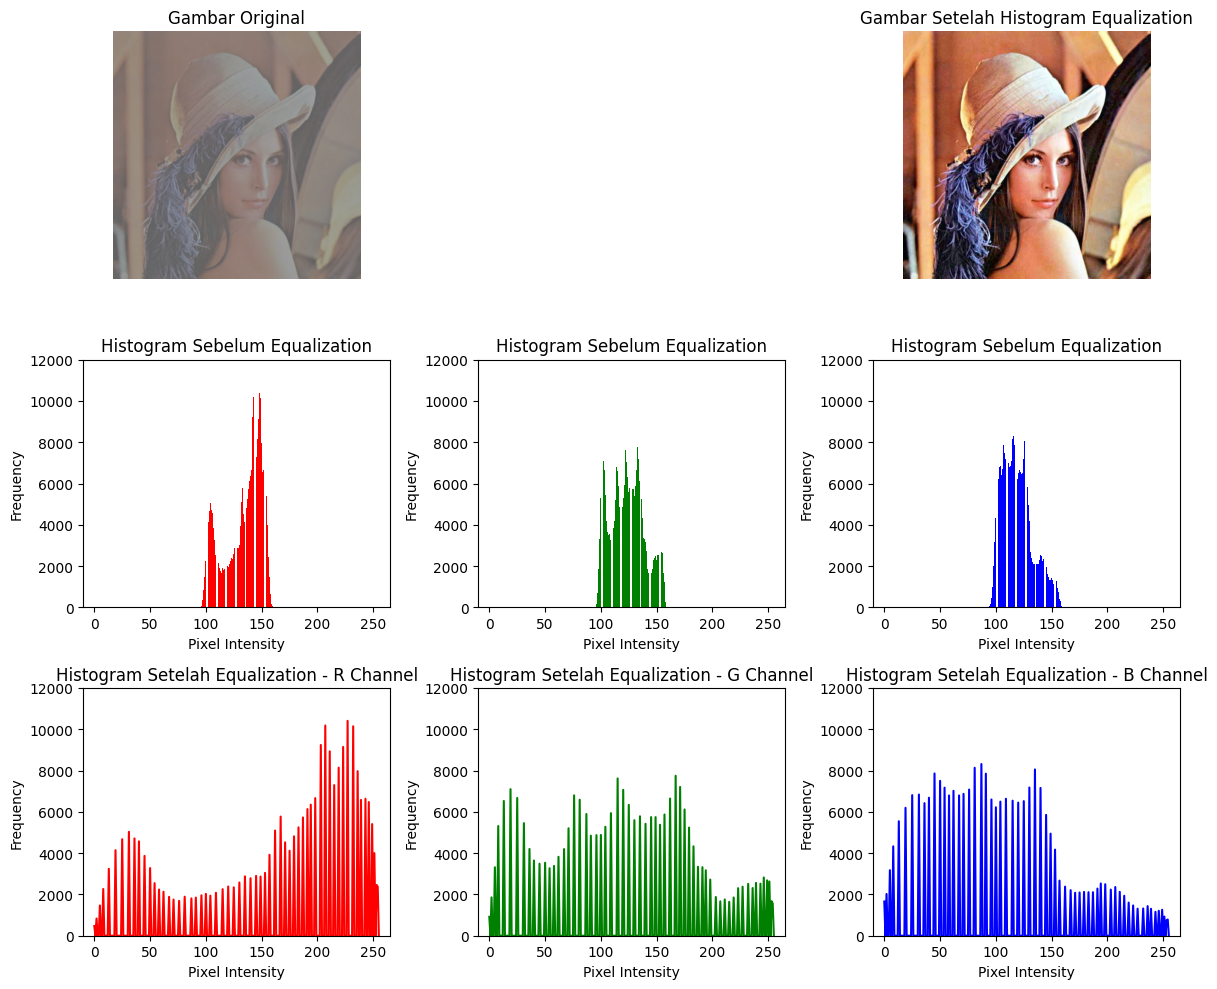

In [20]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()

cdf_normalized = cdf * hist.max() / cdf.max()

cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

img_equalized = cdf_final[img]

plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title('Gambar Original')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(img_equalized)
plt.title('Gambar Setelah Histogram Equalization')
plt.axis('off')

colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    plt.subplot(3, 3, 3 + i + 1)
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.bar(range(256), hist.flatten(), color=color)
    plt.title('Histogram Sebelum Equalization')
    plt.xlim([-10, 265])
    plt.ylim([0, 12000])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

for i, color in enumerate(colors):
    plt.subplot(3, 3, 6 + i + 1)
    hist_eq = cv.calcHist([img_equalized], [i], None, [256], [0, 256])
    plt.plot(hist_eq, color=color)
    plt.title(f'Histogram Setelah Equalization - {color.upper()} Channel')
    plt.xlim([-10, 265])
    plt.ylim([0, 12000])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

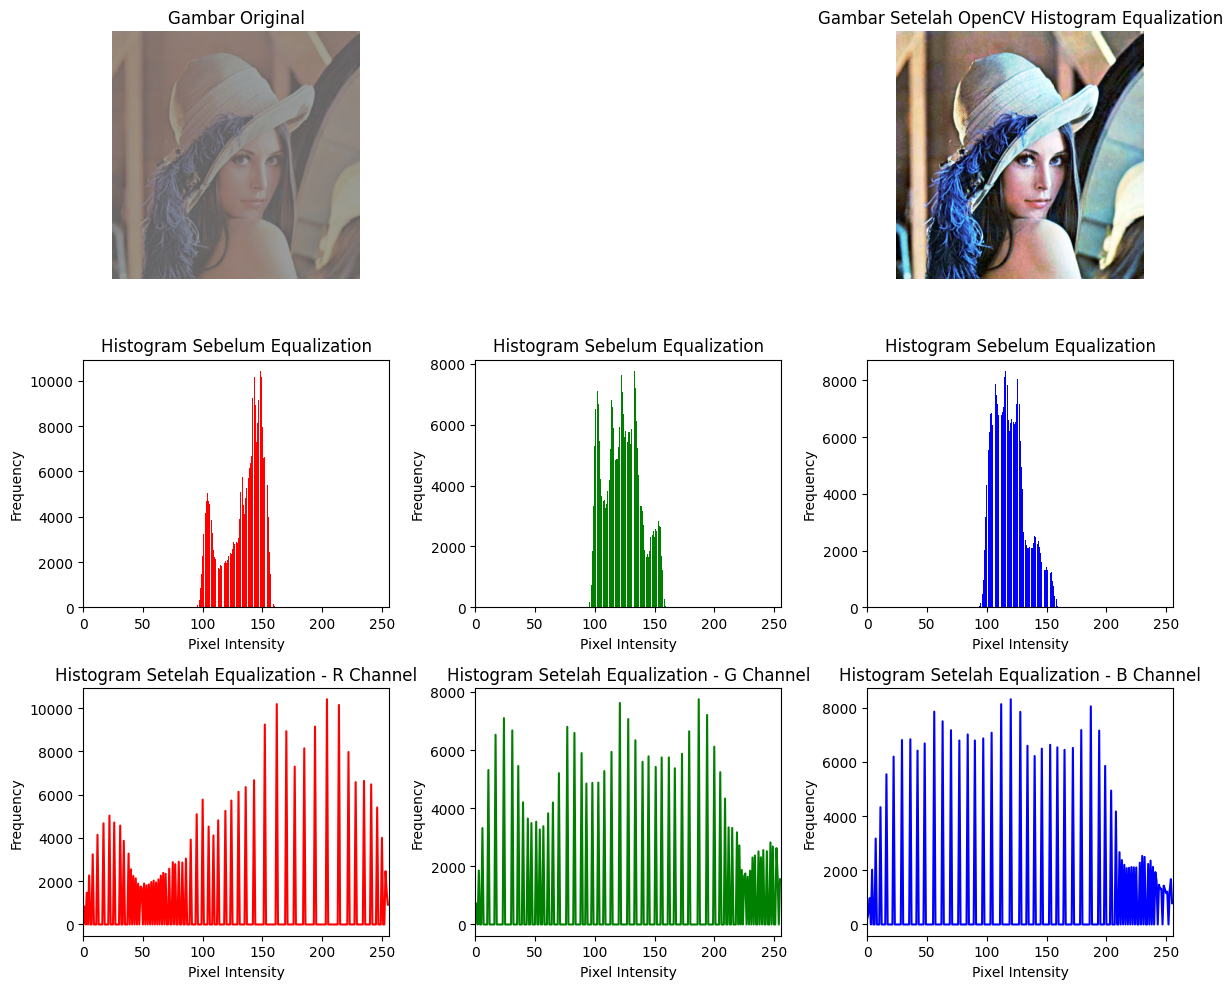

In [21]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_equalized = np.zeros_like(img)
for i in range(3):
    img_equalized[:, :, i] = cv.equalizeHist(img[:, :, i])

plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title('Gambar Original')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(img_equalized)
plt.title('Gambar Setelah OpenCV Histogram Equalization')
plt.axis('off')

colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    plt.subplot(3, 3, 3 + i + 1)
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.bar(range(256), hist.flatten(), color=color)
    plt.title('Histogram Sebelum Equalization')
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

for i, color in enumerate(colors):
    plt.subplot(3, 3, 6 + i + 1)
    hist_eq = cv.calcHist([img_equalized], [i], None, [256], [0, 256])
    plt.plot(hist_eq, color=color)
    plt.title(f'Histogram Setelah Equalization - {color.upper()} Channel')
    plt.xlim([0, 256])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

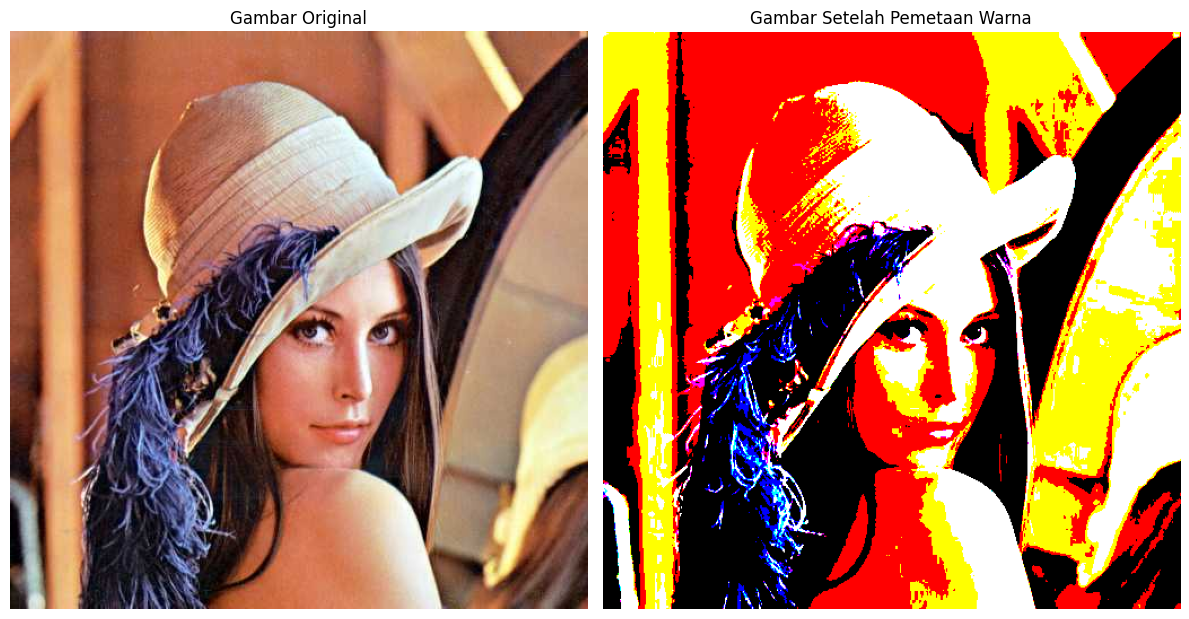

In [22]:
def get_nearest_color(r, g, b):
    colors = {
        "black": [0, 0, 0],
        "green": [0, 255, 0],
        "yellow": [255, 255, 0],
        "blue": [0, 0, 255],
        "cyan": [0, 255, 255],
        "magenta": [255, 0, 255],
        "red": [255, 0 ,0 ],
        "white": [255, 255, 255]
    }

    distances = {color: np.linalg.norm(np.array([r, g, b]) - np.array(rgb)) for color, rgb in colors.items()}
    nearest_color = min(distances, key=distances.get)
    return colors[nearest_color]

img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_mapped = np.zeros_like(img)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r, g, b = img[i, j]
        nearest_rgb = get_nearest_color(r, g, b)
        img_mapped[i, j] = nearest_rgb

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Gambar Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_mapped)
plt.title('Gambar Setelah Pemetaan Warna')
plt.axis('off')

plt.tight_layout()
plt.show()

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

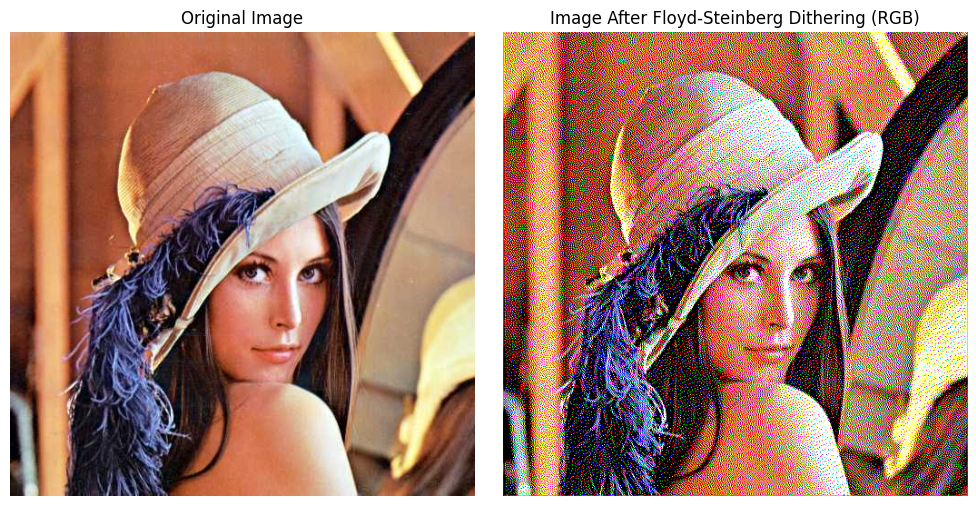

In [23]:
# Load the image in RGB format
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Konversi gambar ke RGB

# Normalize the image to have pixel values between 0 and 1
img = img.astype(np.float32) / 255.0

# Get the dimensions of the image
rows, cols, channels = img.shape

# Create a copy of the image to apply the dithering
dithered_img = np.copy(img)

# Apply Floyd-Steinberg dithering on each channel independently
for y in range(rows - 1):
    for x in range(1, cols - 1):
        for c in range(channels):  # Iterasi melalui setiap kanal warna (R, G, B)
            old_pixel = dithered_img[y, x, c]
            new_pixel = np.round(old_pixel)  # Quantize to either 0 or 1
            dithered_img[y, x, c] = new_pixel
            error = old_pixel - new_pixel

            # Distribute the error to neighboring pixels
            dithered_img[y, x+1, c] += error * 7 / 16
            dithered_img[y+1, x-1, c] += error * 3 / 16
            dithered_img[y+1, x, c]   += error * 5 / 16
            dithered_img[y+1, x+1, c] += error * 1 / 16

# Convert dithered image back to 0-255 range for display
dithered_img = (dithered_img * 255).astype(np.uint8)

# Display the original and dithered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dithered_img)
plt.title('Image After Floyd-Steinberg Dithering (RGB)')
plt.axis('off')

plt.tight_layout()
plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

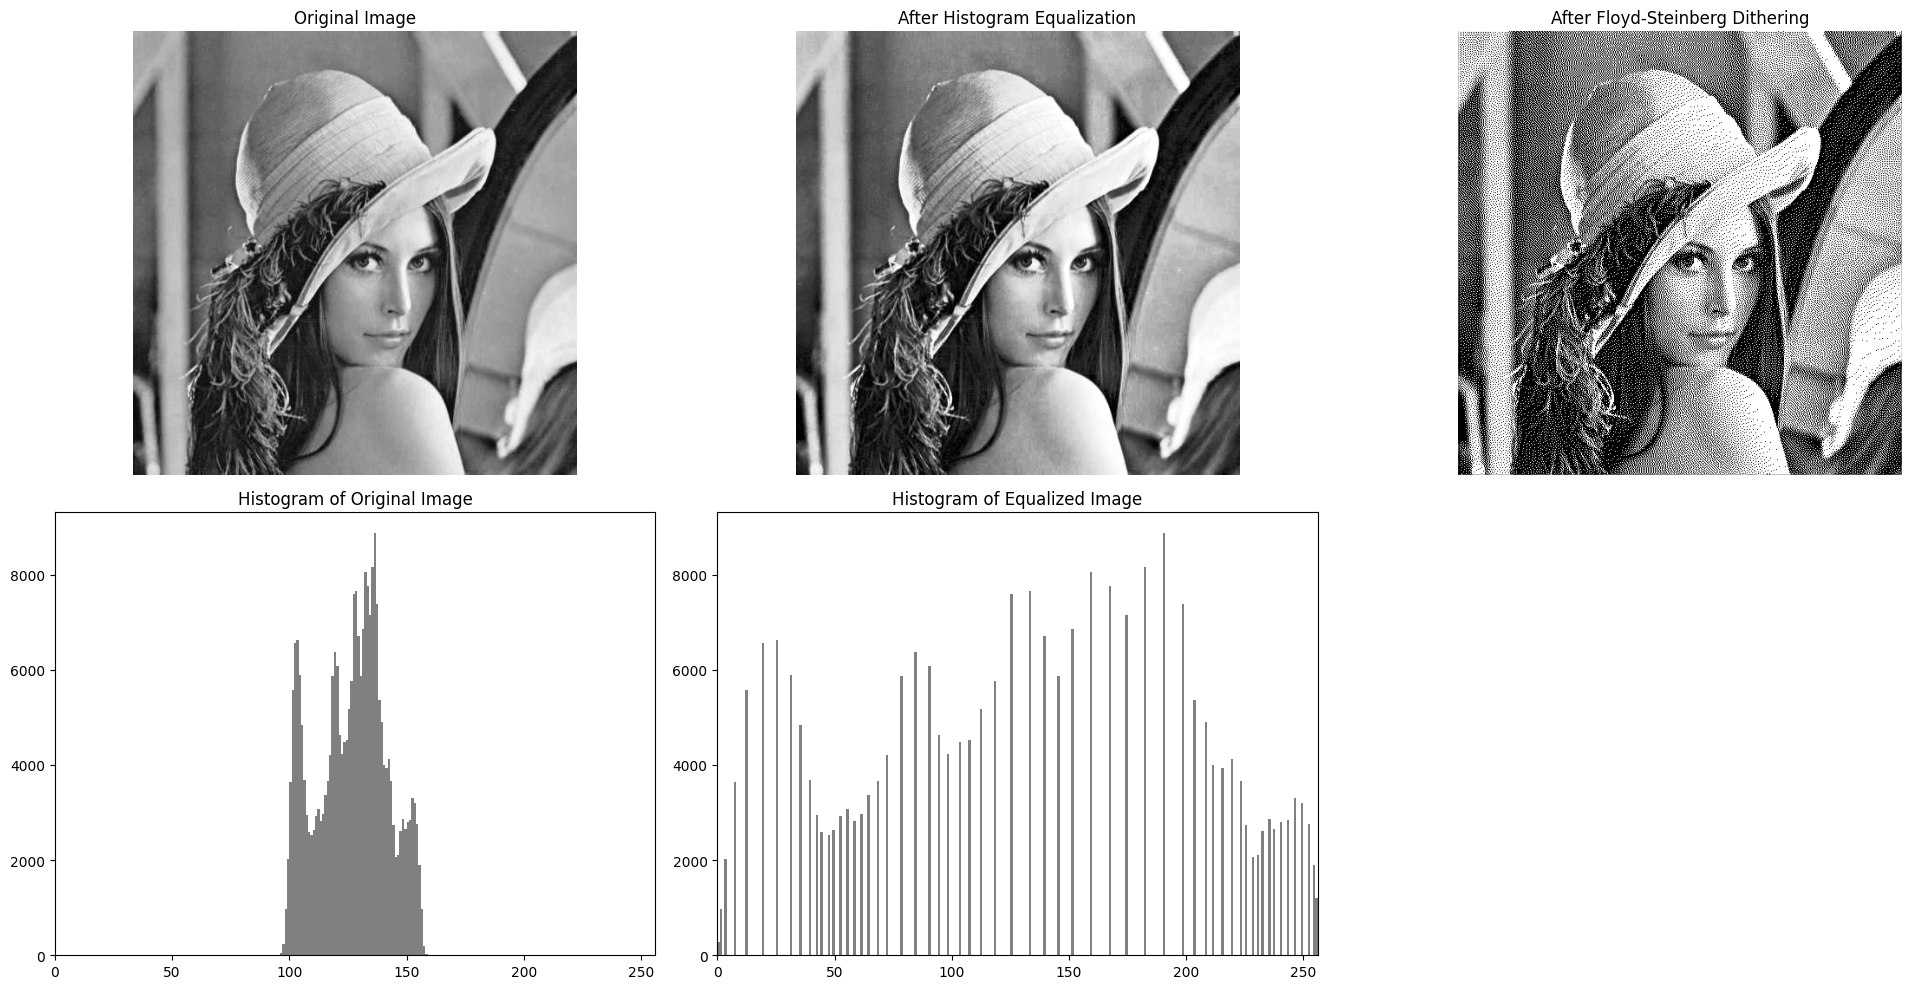

In [27]:
img_path = '/content/drive/MyDrive/PCVK/Images/lena_lc.jpg'
img = cv.imread(img_path)
img_ori = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Convert the image to grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized_img = cv.equalizeHist(gray_img)

# Normalize the equalized image to have pixel values between 0 and 1
img_normalized = equalized_img.astype(np.float32) / 255.0

# Get the dimensions of the image
rows, cols = img_normalized.shape

# Create a copy of the image to apply the dithering
dithered_img = np.copy(img_normalized)

# Apply Floyd-Steinberg dithering
for y in range(rows - 1):
    for x in range(1, cols - 1):
        old_pixel = dithered_img[y, x]
        new_pixel = np.round(old_pixel)  # Quantize to either 0 or 1
        dithered_img[y, x] = new_pixel
        error = old_pixel - new_pixel

        # Distribute the error to neighboring pixels
        dithered_img[y, x + 1] += error * 7 / 16
        dithered_img[y + 1, x - 1] += error * 3 / 16
        dithered_img[y + 1, x] += error * 5 / 16
        dithered_img[y + 1, x + 1] += error * 1 / 16

# Convert dithered image back to 0-255 range for display
dithered_img = (dithered_img * 255).astype(np.uint8)

# Plot original, equalized, dithered images and their histograms
plt.figure(figsize=(20, 10))

# Original Image and Histogram
plt.subplot(2, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.hist(gray_img.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram of Original Image')
plt.xlim([0, 256])

# Equalized Image and Histogram
plt.subplot(2, 3, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('After Histogram Equalization')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.hist(equalized_img.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram of Equalized Image')
plt.xlim([0, 256])

# Dithered Image and Histogram
plt.subplot(2, 3, 3)
plt.imshow(dithered_img, cmap='gray')
plt.title('After Floyd-Steinberg Dithering')
plt.axis('off')

plt.tight_layout()
plt.show()